In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from copy import copy

# Class for K-Means Clustering

In [5]:
class KMeans():
    
    """
    KMeans(K=number of clusters to be leanred(int or float))
    
    Attributes
    =============
    K = (int or float) K value for KMeans clustering
    cluster_centers = NDArray of cluster centers of dimentinon KxD,where D is the dimention of datapoints
    cluster_idx = NDArray . entries correspond to the cluster cluster_centers[cluster_idx]
    init_cluster_center = NDArray.cluster centers initally guessed.
    
    Methoeds
    ==============
    fit(X,max_iters)
        X - NDArray expected of shape NxD. N is total number of datapoints . D is the dimentino of data points.
        max_iters - int, maximum iterations.
        
    ToDo:
        breaking based on convergence.
    """
    def __init__(self,K):
        self.K=K
        self.cluster_centers = None
        self.cluster_idx = None
        self.init_cluster_ceters = None
    
    def predict(self,X):
    
        return np.argmin(self.compute_distances(X,self.cluster_centers))
    
    def compute_distances(self,X,centroids ):
        """

        Computing distances between datapoints X and centroids in `centroids`.


        Parameters
        ===========
        X: NDArray of size NxD , where N is the total number of datapoints. D is Dimention of the datapoints.
        centroids: NDArray of size KxD, where K is number of clusters to be found. D is dimention of datapoints.


        Returns
        ============

        distances: NDArray of size KxN. row j has  the distance of ith point to hte jth centroid.


        """
        distances = np.empty((centroids.shape[0] , X.shape[0]))
        for idx,centroid in enumerate(centroids):
                distances[idx,:] = np.sqrt( (((X) - (centroid))**2).sum(axis=1) )

        return np.array(distances)
    
    
    def fit(self, X,max_iters =10):
        """
        Parameters
        ========
        X is an ND Array
        
    
        """
        centroids = X[np.random.choice(X.shape[0], self.K),:]
        self.init_cluster_ceters = copy(centroids)
        
        for iters_ in range(max_iters):
            distances = self.compute_distances(X,centroids)
            nearest_cluster =  np.argmin(distances,axis=0)
            for i in range(self.K):
                centroids[i,:] = X[nearest_cluster==i].mean(axis=0)
            
        
            
        
        
        self.cluster_centers = centroids
        self.cluster_idx = nearest_cluster

        
    def generate_circle_sample_data(self,r, n, sigma):
    
        """
        Generate circle data with random Gaussian noise.

        Parameters
        ========
        r: radius of the circle
        n: number of data points
        sigma: standard deviation

        Return
        ========
        x: x coordinate of the point
        y: y coordinate of the point

        """
        angles = np.random.uniform(low=0, high=2*np.pi, size=n)

        x_epsilon = np.random.normal(loc=0.0, scale=sigma, size=n)
        y_epsilon = np.random.normal(loc=0.0, scale=sigma, size=n)

        x = r*np.cos(angles) + x_epsilon
        y = r*np.sin(angles) + y_epsilon
        return x, y

    def generate_concentric_circles_data(self,param_list):
        coordinates = [self.generate_circle_sample_data(param[0], param[1], param[2]) for param in param_list]
        return coordinates

    def generate_coordinates(self,n,radiuss,sigmas):
        """Gives the coordinates of the points as a list of tuples with x and y coordinates

        Args:
            n (int): number of points
            radiuss (List): list of radiuses of concentric circles
            sigmas (List): standard deviations for the points

        Returns:
            List: Contains all the points as tuples

        """
        param_lists = [[(r, n, sigma) for r in radiuss] for sigma in sigmas] 
        # We store the data on this list.
        coordinates_list = []

        #fig, axes = plt.subplots(3, 1, figsize=(7, 21))

        for i, param_list in enumerate(param_lists):

            coordinates = self.generate_concentric_circles_data(param_list)

            coordinates_list.append(coordinates)
        
        x_coord = []
        y_coord = []
        points = []
        for i in range(len(radiuss)):
            for j in range(n):
                x_coord.append(coordinates_list[0][i][0][j])
                y_coord.append(coordinates_list[0][i][1][j])
        
        [points.append((x_coord[i],y_coord[i])) for i in range(len(x_coord))]

        return points
        


### Dataset for concentric circles

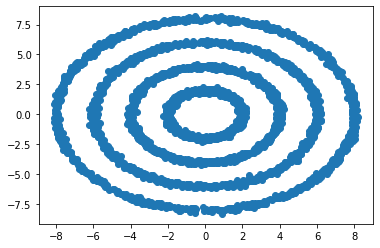

In [45]:
n = 10
rad = [2,4,6,8]
sig = [0.1]
k = KMeans(2)
point = k.generate_coordinates(1000,[2,4,6,8],[0.1])
X = np.array(point)
plt.scatter(X[:,0] , X[:,1])



### KMeans Clustering for concentric circles

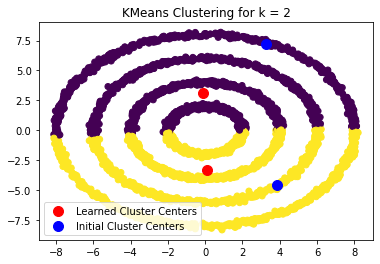

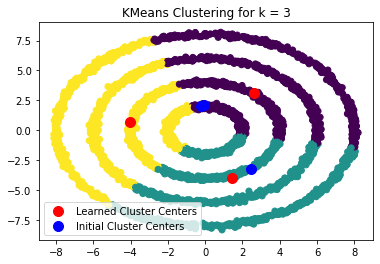

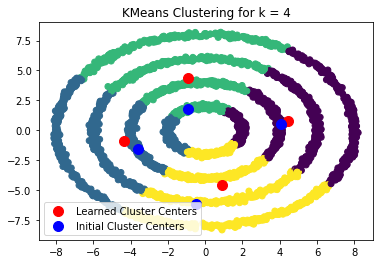

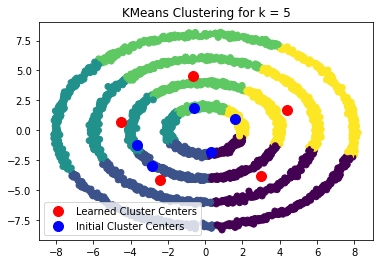

In [46]:
for i in range(2,6):
    k = KMeans(i)
    point = k.generate_coordinates(1000,[2,4,6,8],[0.1])
    k.fit(X,max_iters=10)
    plt.scatter(X[:,0] , X[:,1],c= k.cluster_idx)
    plt.scatter(k.cluster_centers[:,0] , k.cluster_centers[:,1],s=100,c='r',label = "Learned Cluster Centers")
    plt.scatter(k.init_cluster_ceters[:,0] , k.init_cluster_ceters[:,1],s=100,c='b' , label = "Initial Cluster Centers")
    plt.title(f"KMeans Clustering for k = {i}")
    plt.legend()
    plt.show()


### Two Intersecting Circles - Dataset

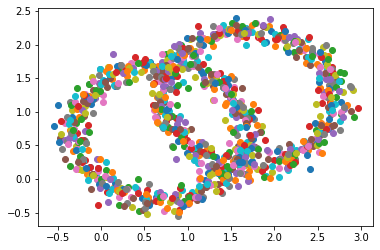

In [48]:
points = []
for i in range(1,1000):
    a = i
    x = np.cos(a) + (i>500) + np.random.normal(7)*0.1
    y = np.sin(a) + (i>500)*0.5 +  np.random.normal(7)*0.1
    plt.scatter(x,y)
    points.append((x,y))

### Kmeans clustering on 2 intersecting circles

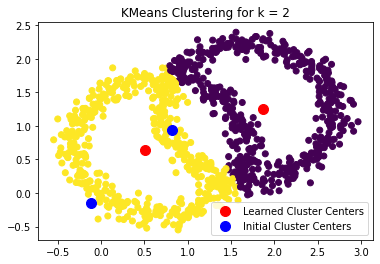

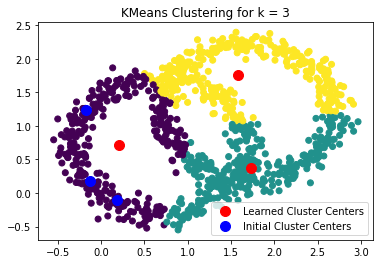

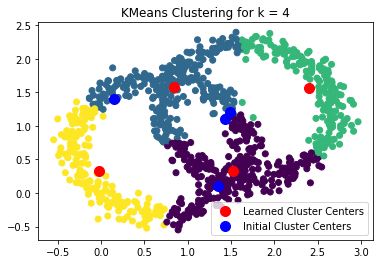

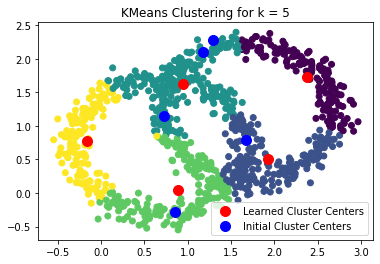

In [49]:
for i in range(2,6):
    k = KMeans(i)
    #point = k.generate_coordinates(1000,[2,4,6],[0.1])
    X = np.array(points)
    k.fit(X,max_iters=100)
    plt.scatter(X[:,0] , X[:,1],c= k.cluster_idx)
    plt.scatter(k.cluster_centers[:,0] , k.cluster_centers[:,1],s=100,c='r',label = "Learned Cluster Centers")
    plt.scatter(k.init_cluster_ceters[:,0] , k.init_cluster_ceters[:,1],s=100,c='b' , label = "Initial Cluster Centers")
    plt.title(f"KMeans Clustering for k = {i}")
    plt.legend()
    plt.show()

### Moons Dataset

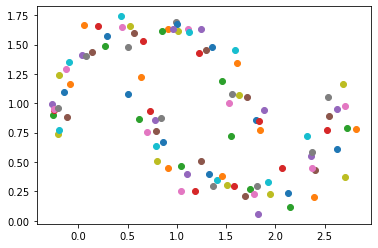

In [53]:
points = []
for i in range(1,100):
    a = i*0.0628319
    x = np.cos(a) + (i>50) + np.random.normal(7)*0.1
    y = np.sin(a) + (i>50)*0.5 +  np.random.normal(7)*0.1
    plt.scatter(x,y)
    points.append((x,y))

### KMeans Clustering on Moons Dataset

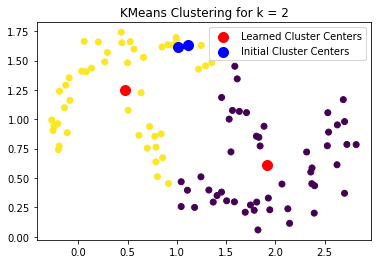

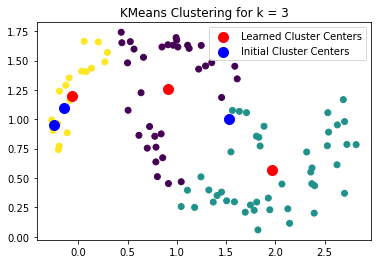

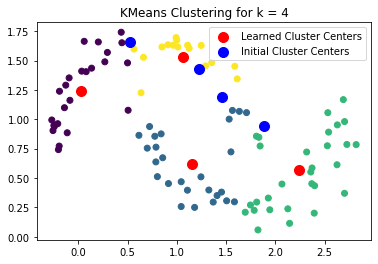

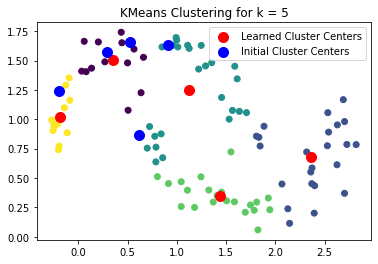

In [54]:
for i in range(2,6):
    k = KMeans(i)
    #point = k.generate_coordinates(1000,[2,4,6],[0.1])
    X = np.array(points)
    k.fit(X,max_iters=100)
    plt.scatter(X[:,0] , X[:,1],c= k.cluster_idx)
    plt.scatter(k.cluster_centers[:,0] , k.cluster_centers[:,1],s=100,c='r',label = "Learned Cluster Centers")
    plt.scatter(k.init_cluster_ceters[:,0] , k.init_cluster_ceters[:,1],s=100,c='b' , label = "Initial Cluster Centers")
    plt.title(f"KMeans Clustering for k = {i}")
    plt.legend()
    plt.show()

### Built in Dataset for moons


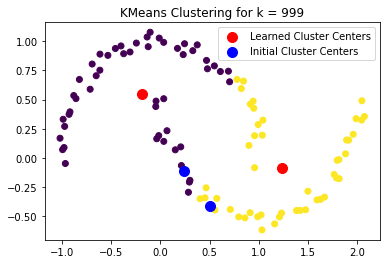

In [35]:
import sklearn.datasets
x,y = sklearn.datasets.make_moons(n_samples=100,noise = 0.05)
X = x
k = KMeans(2)
k.fit(X,max_iters=100)
plt.scatter(X[:,0] , X[:,1],c= k.cluster_idx)
plt.scatter(k.cluster_centers[:,0] , k.cluster_centers[:,1],s=100,c='r',label = "Learned Cluster Centers")
plt.scatter(k.init_cluster_ceters[:,0] , k.init_cluster_ceters[:,1],s=100,c='b' , label = "Initial Cluster Centers")
plt.title(f"KMeans Clustering for k = {i}")
plt.legend()
plt.show()
